In [1]:
import numpy as np
import matplotlib.pyplot as pl

In [2]:
def Sin (t):
    return np.sin (2 * np.pi * t)

In [3]:
def f (t):
    return 2 * Sin (2 * t) + Sin (20 * t)

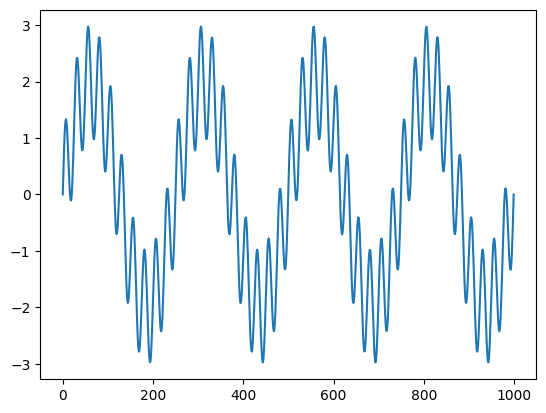

In [4]:
n = 1000
t = np.linspace (0, 2, n)
x = f (t)
pl.plot (x)

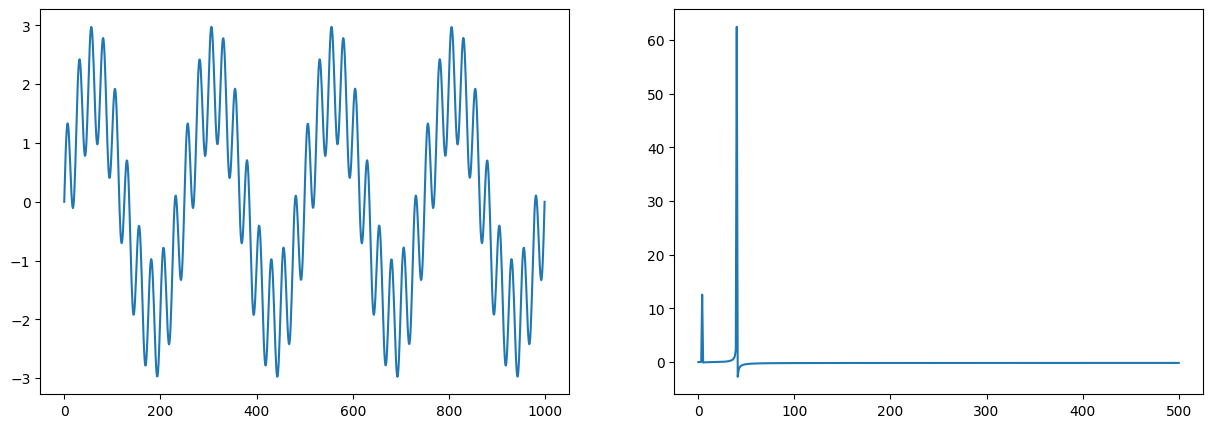

In [5]:
z1 = np.fft.rfft (x)
x1 = np.real (z1)

pl.figure (figsize = (15, 5))
pl.subplot (1, 2, 1); pl.plot (x)
pl.subplot (1, 2, 2); pl.plot (x1)

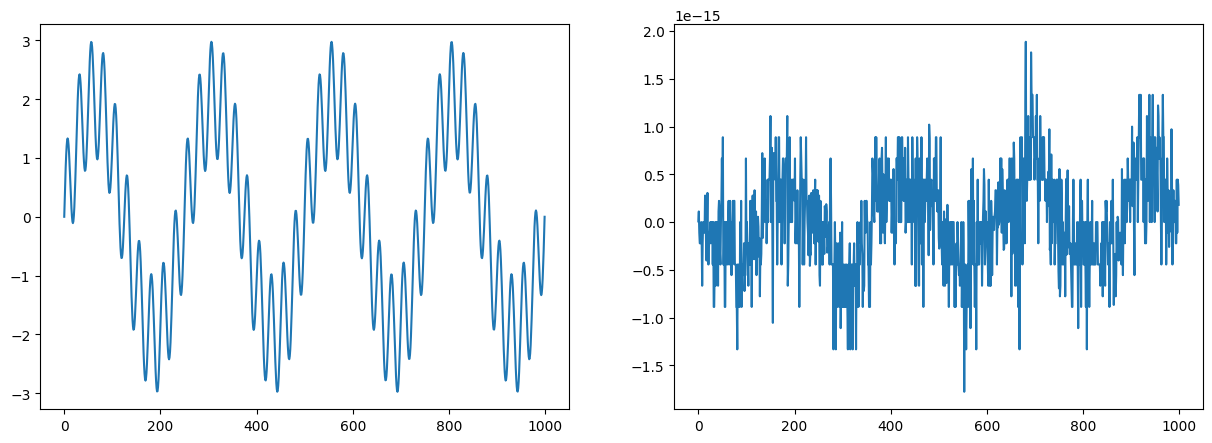

In [6]:
z1i = np.fft.irfft (z1)
x1i = np.real (z1i)

pl.figure (figsize = (15, 5))
pl.subplot (1, 2, 1); pl.plot (x1i)
pl.subplot (1, 2, 2); pl.plot (x - x1i)

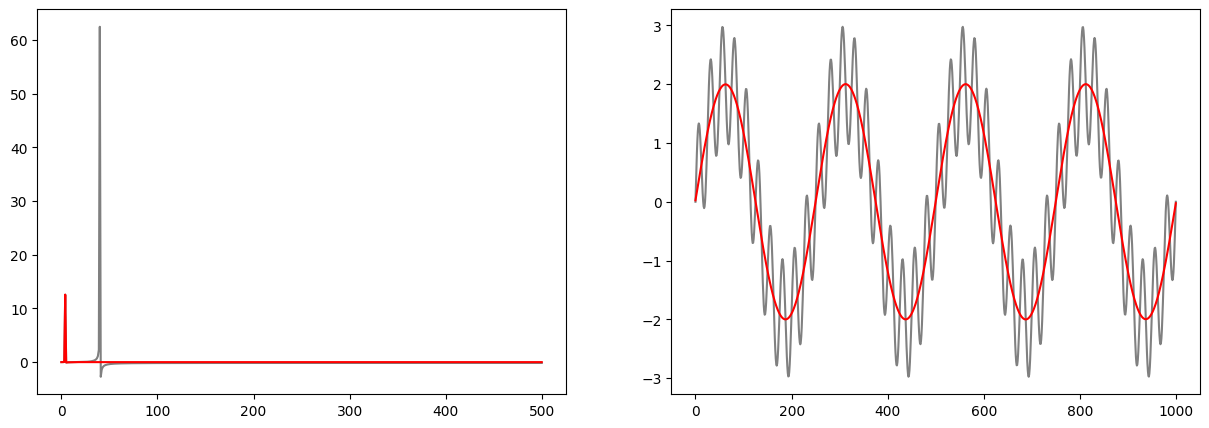

In [7]:
z2 = np.copy (z1)
z2 [10:] = 0+0j
x2 = np.real (z2)

z2i = np.fft.irfft (z2)
x2i = np.real (z2i)

pl.figure (figsize = (15, 5))
pl.subplot (1, 2, 1); pl.plot (x1, 'gray'); pl.plot (x2, 'red')
pl.subplot (1, 2, 2); pl.plot (x, 'gray'); pl.plot (x2i, 'red')

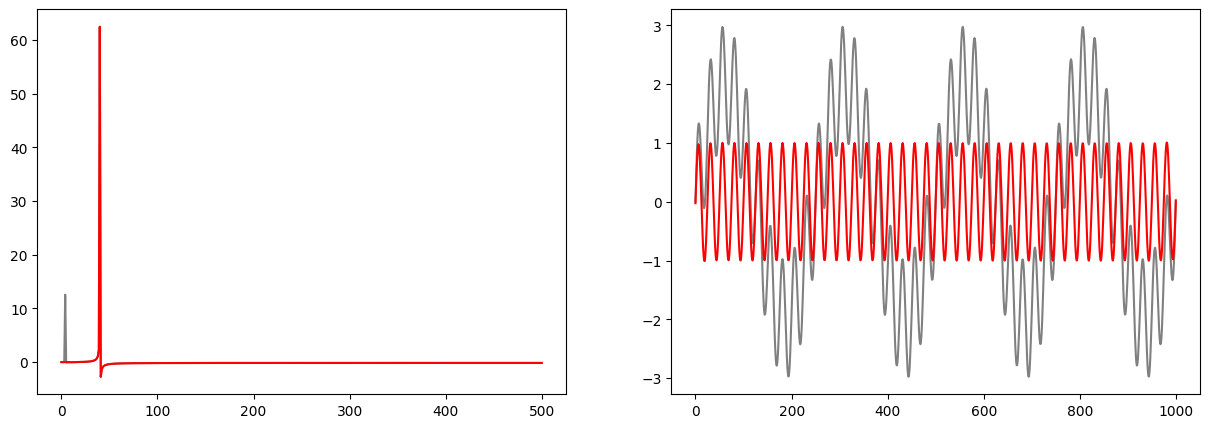

In [8]:
z3 = np.copy (z1)
z3 [:10] = 0+0j
x3 = np.real (z3)

z3i = np.fft.irfft (z3)
x3i = np.real (z3i)

pl.figure (figsize = (15, 5))
pl.subplot (1, 2, 1); pl.plot (x1, 'gray'); pl.plot (x3, 'red')
pl.subplot (1, 2, 2); pl.plot (x, 'gray'); pl.plot (x3i, 'red')

In [9]:
def Gaussian (sigma, x):
    return np.exp (- x ** 2 / (2 * sigma ** 2)) / (sigma * np.sqrt (2 * np.pi))

<StemContainer object of 3 artists>

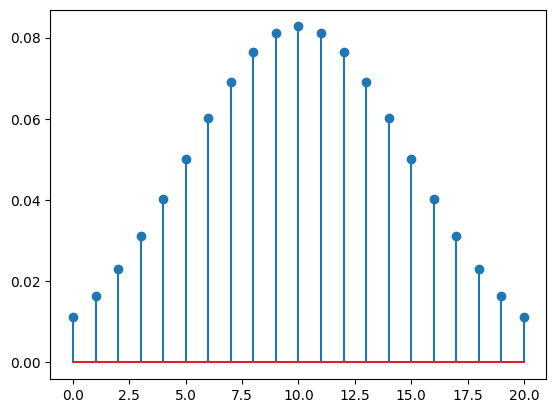

In [10]:
sigma = 5
r = 10
kernel = Gaussian (sigma, np.linspace (-r, r, 2 * r + 1))
kernel /= np.sum (kernel)
pl.stem (kernel)

In [11]:
y = np.convolve (x, kernel, mode = 'same')

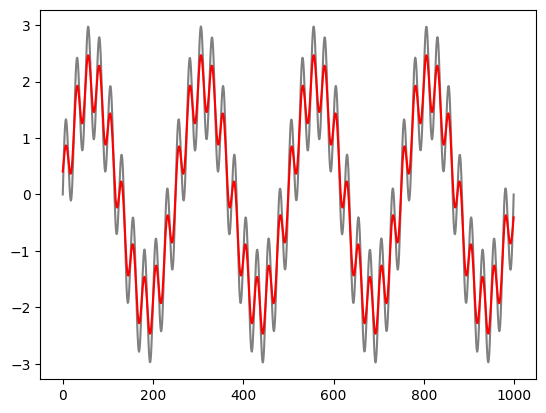

In [12]:
pl.plot (x, 'gray')
pl.plot (y, 'red')

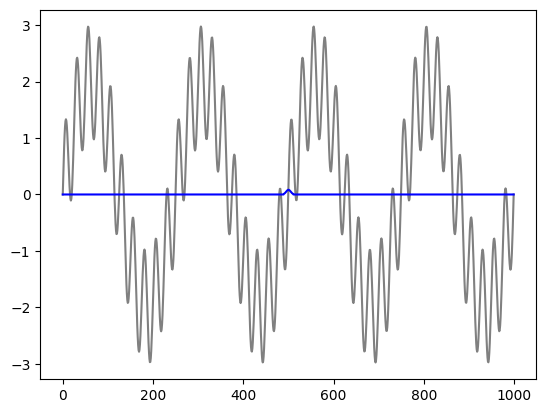

In [13]:
k = np.zeros_like (x)
k [n // 2 - r : n // 2 + r + 1] = kernel
pl.plot (x, 'gray')
pl.plot (k, 'blue')

x: (1000,)
k: (1000,)
z4: (501,)
x4: (501,)


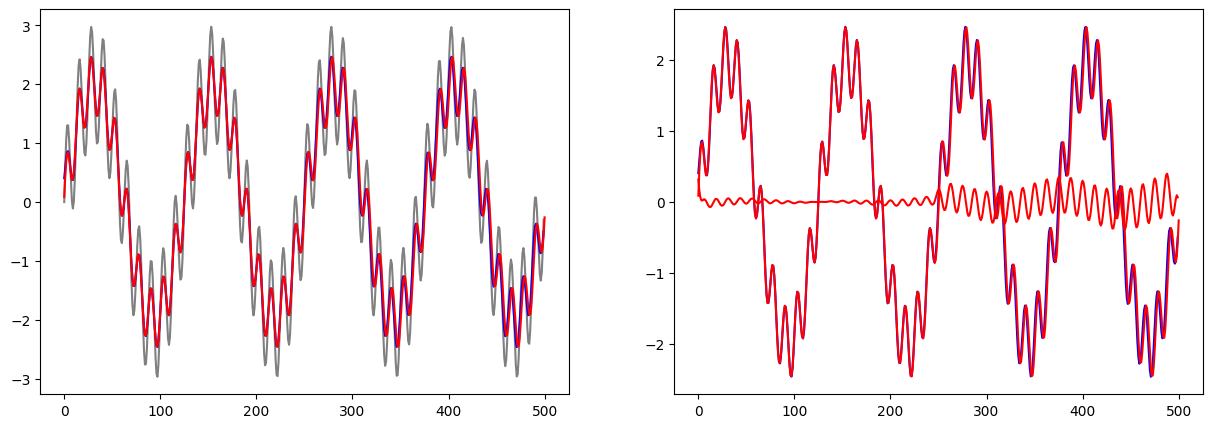

In [14]:
z4 = np.fft.ifft (np.fft.rfft (x) * np.fft.rfft (k))
x4 = np.real (z4)

print ('x:', x.shape)
print ('k:', k.shape)
print ('z4:', z4.shape)
print ('x4:', x4.shape)

pl.figure (figsize = (15, 5))
pl.subplot (1, 2, 1)
pl.plot (x [::2], 'gray')
pl.plot (y [::2], 'blue')
pl.plot (x4, 'red')
pl.subplot (1, 2, 2)
pl.plot (y [::2], 'blue')
pl.plot (x4, 'red')
pl.plot (y [::2] - x4 [:-1], 'red')